<a href="https://colab.research.google.com/github/trongtn2110/CS114.L21/blob/master/Colab/plotData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ĐỌC FILE CSV**

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Linear_regression/data

/content/drive/MyDrive/Colab Notebooks/Linear_regression/data


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear_regression/data/wecode.csv")
final_score = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear_regression/data/score_training.csv")

In [ ]:
# Xóa các mục không cần thiết
del data["updated_at"]
del data["file_name"]
del data["language_id"]

In [ ]:
data

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,created_at
0,4,0,3,4,1,SCORE,10000,100,2020-10-30 10:58:11
1,5,0,4,4,1,SCORE,10000,100,2020-10-30 11:07:09
2,6,0,5,4,0,Compilation Error,0,100,2020-10-30 11:08:01
3,7,0,5,4,0,Compilation Error,0,100,2020-10-30 11:11:41
4,8,0,5,4,0,Compilation Error,0,100,2020-10-30 11:15:06
...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,2021-04-28 09:34:20
264602,266668,0,25,1796,0,Compilation Error,0,100,2021-04-28 09:35:07
264603,266669,0,25,1796,1,SCORE,10000,100,2021-04-28 09:35:15
264604,266670,0,150,255,1,SCORE,6250,100,2021-05-11 01:34:57


#**XỬ LÝ DATA THEO CÁC CHỈ SỐ CỦA CÁC NHÓM**

In [ ]:
data.insert(2,'sum_submit',1)


In [ ]:

data_user = data.groupby(['user_id']).sum()
#so luong problem
data_user['sum_problem'] = data_user['is_final']
del data_user['is_final']
del data_user['id']
del data_user['problem_id']
del data_user['assignment_id']
del data_user['pre_score']
#so problem dung
data_temp= data[data['is_final'] == 1]
data_temp = data_temp[data_temp['pre_score'] == 10000]
data_temp = data_temp.groupby('user_id').sum()
data_user['sum_problem_correct'] = data_temp['is_final']
#so submit dung
data_temp = data[data['pre_score'] == 10000]
data_temp = data_temp.groupby('user_id').sum()
data_user['sum_submit_correct'] = data_temp['sum_submit']
#tong diem cac submit final
data_temp= data[data['is_final'] == 1]
data_temp = data_temp.groupby('user_id').sum()
data_user['total_final_score'] = data_temp['pre_score']
data_user

,sum_submit,sum_problem,sum_problem_correct,sum_submit_correct,total_final_score
user_id,,,,,
1,2,2,1.0,1.0,10000.0
4,54,38,37.0,44.0,370000.0
5,6,5,3.0,3.0,30000.0
6,130,88,85.0,89.0,850000.0
7,5,2,NaN,NaN,9209.0
...,...,...,...,...,...
1860,76,48,28.0,29.0,329665.0
1862,12,6,4.0,4.0,40000.0
1864,187,63,28.0,30.0,439741.0


In [ ]:
data_user['per_problem'] = data_user['sum_problem_correct'] / data_user['sum_problem']
data_user['problem/submit'] = data_user['sum_problem'] / data_user['sum_submit']
data_user['per_submit'] = data_user['sum_submit_correct'] / data_user['sum_submit']
data_user

,sum_submit,sum_problem,sum_problem_correct,sum_submit_correct,total_final_score,per_problem,problem/submit,per_submit
user_id,,,,,,,,
1,2,2,1.0,1.0,10000.0,0.500000,1.000000,0.500000
4,54,38,37.0,44.0,370000.0,0.973684,0.703704,0.814815
5,6,5,3.0,3.0,30000.0,0.600000,0.833333,0.500000
6,130,88,85.0,89.0,850000.0,0.965909,0.676923,0.684615
7,5,2,NaN,NaN,9209.0,NaN,0.400000,NaN
...,...,...,...,...,...,...,...,...
1860,76,48,28.0,29.0,329665.0,0.583333,0.631579,0.381579
1862,12,6,4.0,4.0,40000.0,0.666667,0.500000,0.333333
1864,187,63,28.0,30.0,439741.0,0.444444,0.336898,0.160428


#**XỬ LÝ FILE ĐIỂM CUỐI KÌ**

In [ ]:
score = final_score[['id','CK']]
score = score.rename(columns={'id' :'user_id'})
score

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


#**GỘP FILE ĐIỂM CUỐI KÌ VÀ FILE USER**

In [ ]:
data_final = pd.merge(data_user,score,on='user_id',how='outer')
data_final

,user_id,sum_submit,sum_problem,sum_problem_correct,sum_submit_correct,total_final_score,per_problem,problem/submit,per_submit,CK
0,1,2.0,2.0,1.0,1.0,10000.0,0.500000,1.000000,0.500000,NaN
1,4,54.0,38.0,37.0,44.0,370000.0,0.973684,0.703704,0.814815,NaN
2,5,6.0,5.0,3.0,3.0,30000.0,0.600000,0.833333,0.500000,NaN
3,6,130.0,88.0,85.0,89.0,850000.0,0.965909,0.676923,0.684615,NaN
4,7,5.0,2.0,NaN,NaN,9209.0,NaN,0.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1276,1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5
1277,1664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1278,1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1279,1723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


#**XÓA CÁC MỤC CÓ CHỈ SỐ KHÔNG THỂ TÍNH TOÁN (NaN)**

In [ ]:
data_final = data_merge.dropna()
data_final

,user_id,sum_submit,sum_problem,sum_problem_correct,sum_submit_correct,total_final_score,per_problem,problem/submit,per_submit,CK
9,24,164.0,77.0,72.0,80.0,750299.0,0.935065,0.469512,0.487805,9.5
10,27,13.0,5.0,3.0,4.0,39000.0,0.600000,0.384615,0.307692,10
11,29,199.0,80.0,72.0,75.0,762760.0,0.900000,0.402010,0.376884,8.5
13,34,218.0,84.0,81.0,81.0,822888.0,0.964286,0.385321,0.371560,6.5
14,35,297.0,151.0,145.0,152.0,1477000.0,0.960265,0.508418,0.511785,4.5
...,...,...,...,...,...,...,...,...,...,...
1151,1856,64.0,31.0,23.0,23.0,270790.0,0.741935,0.484375,0.359375,7.5
1152,1857,55.0,40.0,37.0,37.0,386000.0,0.925000,0.727273,0.672727,4
1153,1859,31.0,30.0,3.0,3.0,39000.0,0.100000,0.967742,0.096774,1.5
1155,1862,12.0,6.0,4.0,4.0,40000.0,0.666667,0.500000,0.333333,7.5


#**TẠO FILE PLOT ĐỂ BIỄU DIỄN ĐỒ THỊ**

In [ ]:
data_plot = data_final
data_plot = data_plot.sort_values(by='CK')
data_plot

,user_id,sum_submit,sum_problem,sum_problem_correct,sum_submit_correct,total_final_score,per_problem,problem/submit,per_submit,CK
704,1215,109.0,60.0,55.0,58.0,550000.0,0.916667,0.550459,0.532110,0
78,161,68.0,44.0,41.0,41.0,410000.0,0.931818,0.647059,0.602941,0
74,149,216.0,91.0,88.0,90.0,887000.0,0.967033,0.421296,0.416667,0
906,1529,41.0,18.0,15.0,15.0,173777.0,0.833333,0.439024,0.365854,0
112,222,65.0,28.0,23.0,23.0,230000.0,0.821429,0.430769,0.353846,0
...,...,...,...,...,...,...,...,...,...,...
615,1048,182.0,83.0,71.0,72.0,761719.0,0.855422,0.456044,0.395604,
603,1028,365.0,124.0,121.0,123.0,1235776.0,0.975806,0.339726,0.336986,
602,1026,359.0,93.0,90.0,90.0,916888.0,0.967742,0.259053,0.250696,
767,1319,241.0,94.0,86.0,88.0,905442.0,0.914894,0.390041,0.365145,


#**BIỂU DIỄN ĐỒ THỊ**

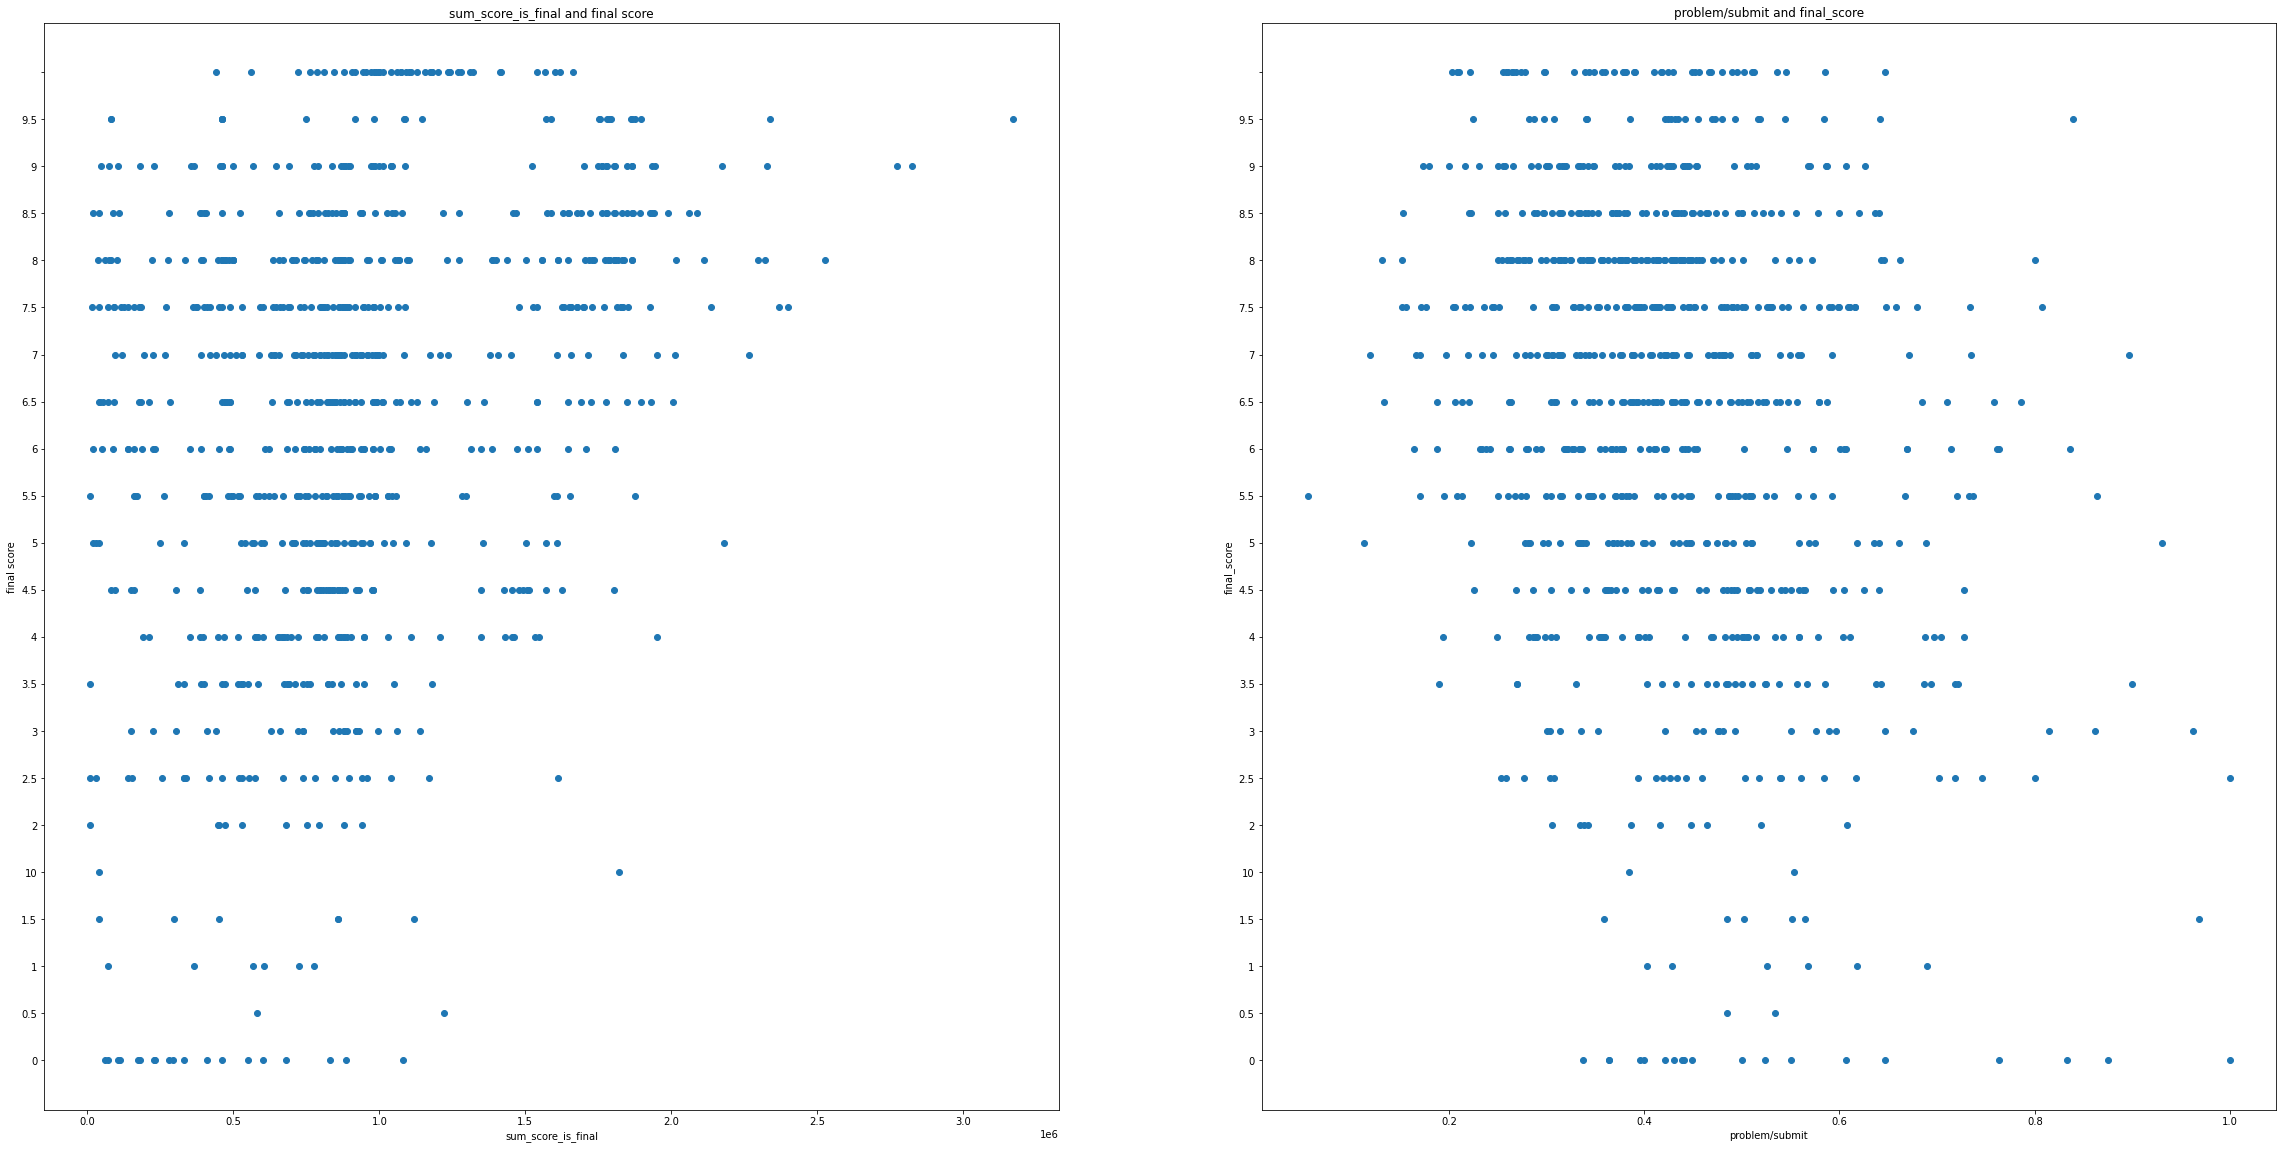

In [ ]:
import matplotlib.pyplot as plt
fig, (axs1, axs2,) = plt.subplots(1,2, figsize = (40,20))
axs1.scatter(x = data_plot['total_final_score'], y = data_plot['CK'])


axs1.set_title("sum_score_is_final and final score")
axs1.set(xlabel='sum_score_is_final', ylabel='final score')


axs2.scatter(x = data_plot['problem/submit'], y = data_plot['CK'])


axs2.set_title("problem/submit and final_score")
axs2.set(xlabel='problem/submit', ylabel='final_score')

plt.show()

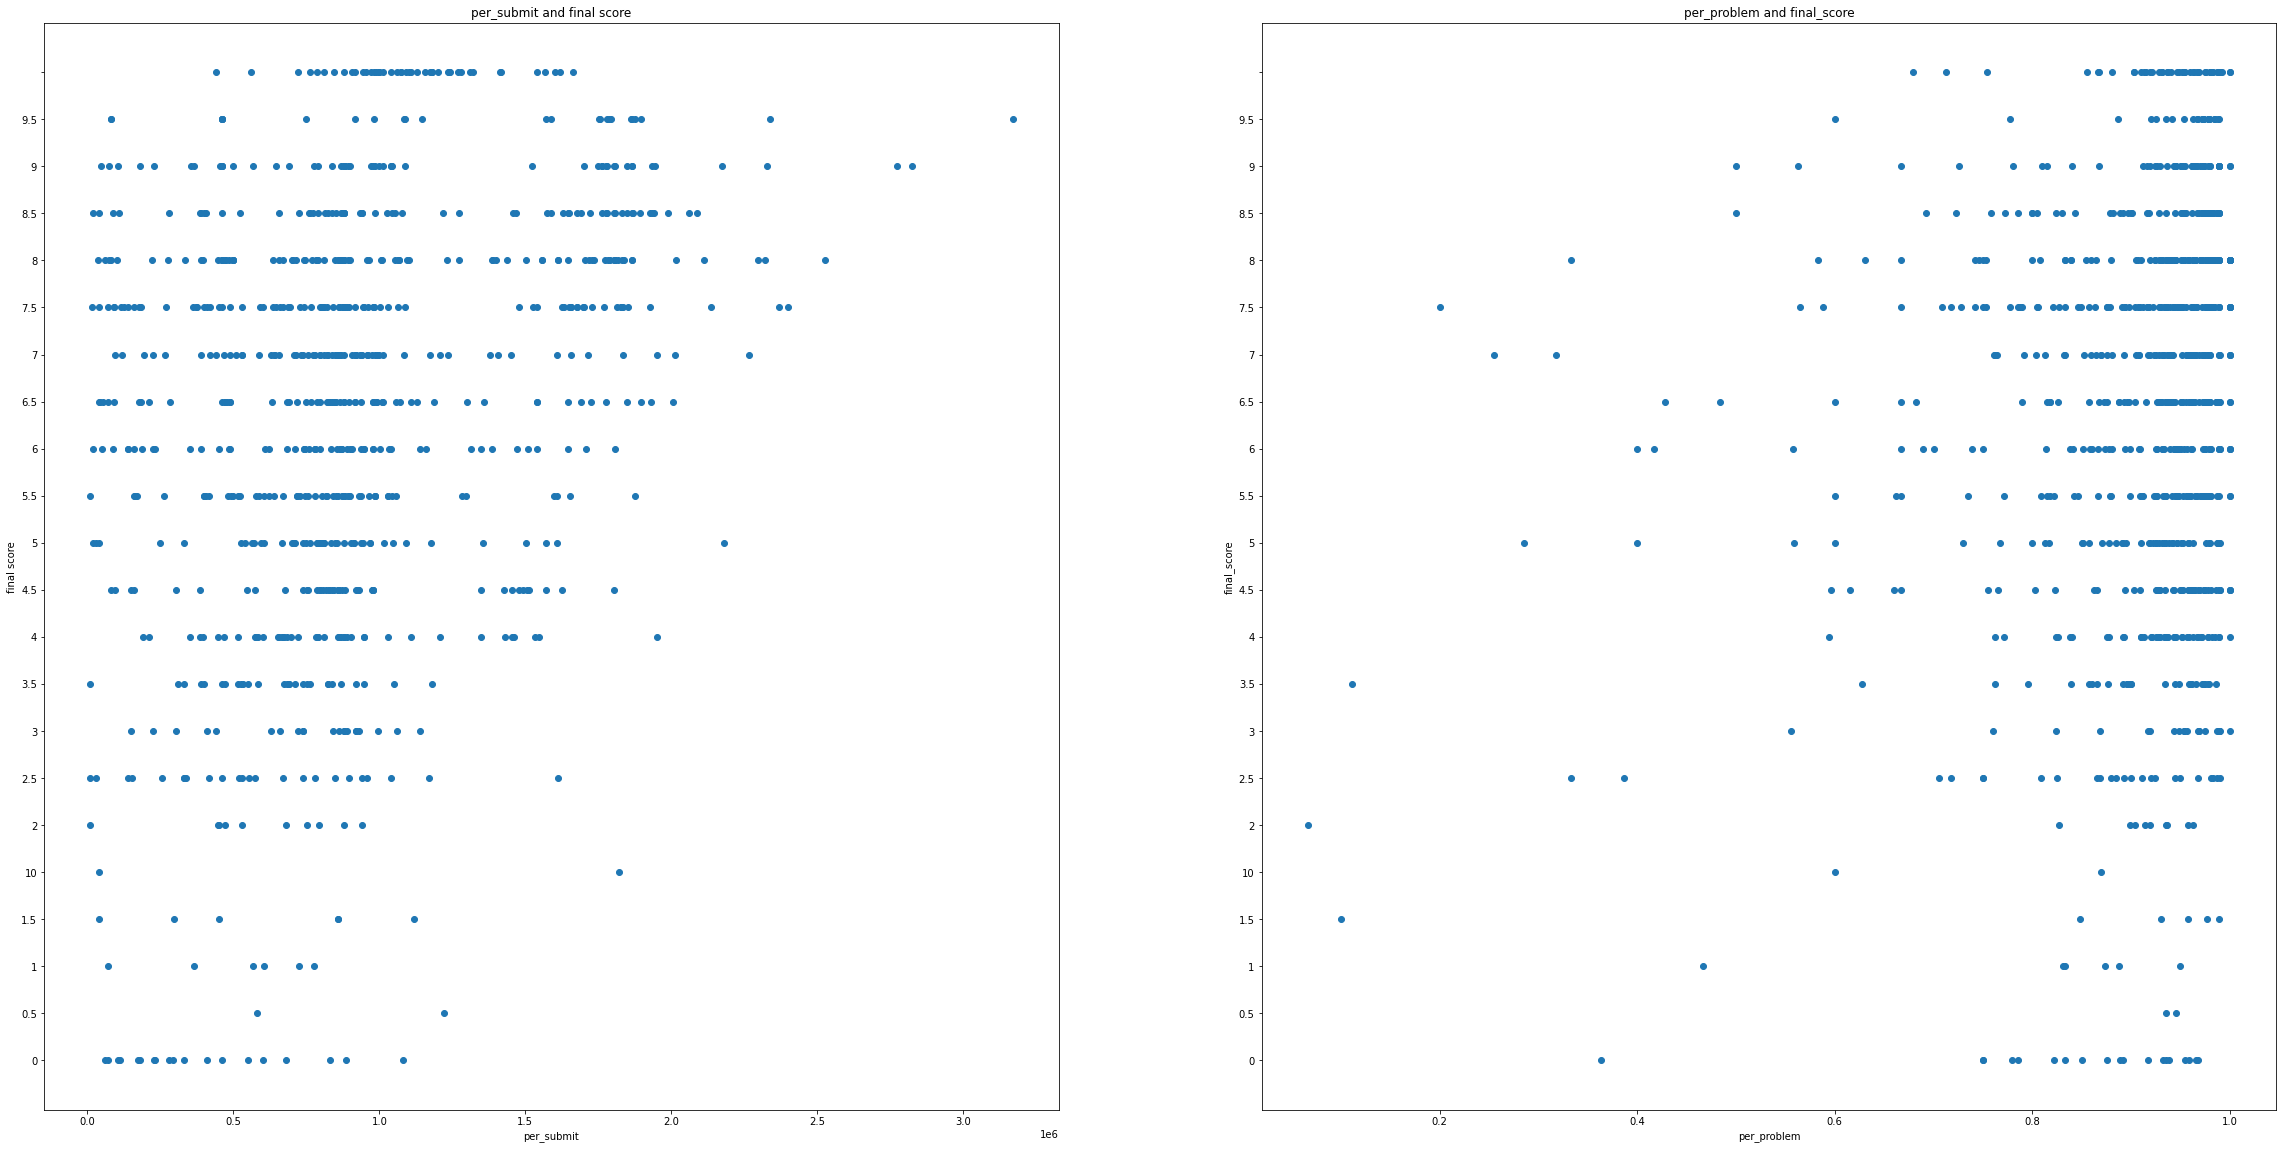

In [ ]:
fig, (axs1, axs2,) = plt.subplots(1,2, figsize = (40,20))
axs1.scatter(x = data_plot['total_final_score'], y = data_plot['CK'])


axs1.set_title("per_submit and final score")
axs1.set(xlabel='per_submit', ylabel='final score')


axs2.scatter(x = data_plot['per_problem'], y = data_plot['CK'])


axs2.set_title("per_problem and final_score")
axs2.set(xlabel='per_problem', ylabel='final_score')

plt.show()